In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_feature = 10000
maxlen = 100
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_feature)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequnces')

print('Pad sequnces (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequnces
Pad sequnces (sample x time)
input_train shape: (25000, 100)
input_test shape: (25000, 100)


In [2]:
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_feature, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 11s 52ms/step - loss: 0.5001 - acc: 0.7641 - val_loss: 0.3947 - val_acc: 0.8298
Epoch 2/10
157/157 [==============================] - 9s 58ms/step - loss: 0.3126 - acc: 0.8712 - val_loss: 0.3333 - val_acc: 0.8530
Epoch 3/10
157/157 [==============================] - 10s 63ms/step - loss: 0.2535 - acc: 0.9019 - val_loss: 0.4670 - val_acc: 0.8232
Epoch 4/10
157/157 [==============================] - 9s 60ms/step - loss: 0.2236 - acc: 0.9139 - val_loss: 0.3815 - val_acc: 0.8446
Epoch 5/10
157/157 [==============================] - 9s 59ms/step - loss: 0.1996 - acc: 0.9260 - val_loss: 0.3678 - val_acc: 0.8462
Epoch 6/10
157/157 [==============================] - 9s 59ms/step - loss: 0.1858 - acc: 0.9317 - val_loss: 0.4080 - val_acc: 0.8456
Epoch 7/10
157/157 [==============================] - 9s 55ms/step - loss: 0.1686 - acc: 0.9402 - val_loss: 0.4204 - val_acc: 0.8376
Epoch 8/10
157/157 [==============================] - 9s 55ms/step 

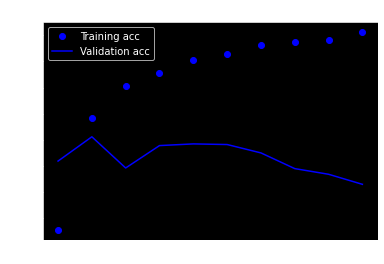

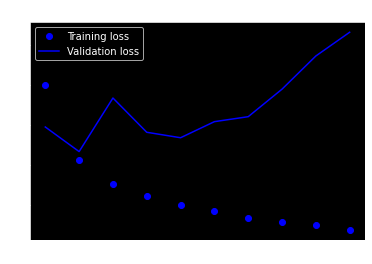

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()